In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
guns = pd.read_csv('../data/GunViolenceClean.csv')

In [17]:
guns.describe()

,GDP,Homicides,Suicides,Guns_Per_Capita,Cultural_Diversity_Index
count,76.000000,76.000000,76.00000,76.000000,76.000000
mean,31548.684211,4.851200,1.05750,14.617671,0.224588
std,24314.711560,11.320607,1.23816,14.662658,0.172565
min,0.000000,0.000000,0.00000,0.500000,0.000000
25%,13075.000000,0.157500,0.29500,5.875000,0.093750
50%,26900.000000,0.355000,0.84000,10.550000,0.185000
75%,44575.000000,3.215000,1.17000,21.175000,0.314000
max,124900.000000,66.640000,6.69000,101.000000,0.667000


### Remove rows with empty fields

In [18]:
guns.shape

(76, 7)

In [19]:
guns = guns.dropna()
guns.shape

(76, 7)

## Visuals

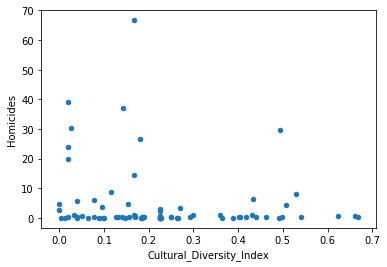

In [20]:
guns.plot.scatter(x='Cultural_Diversity_Index', y='Homicides')
plt.show()

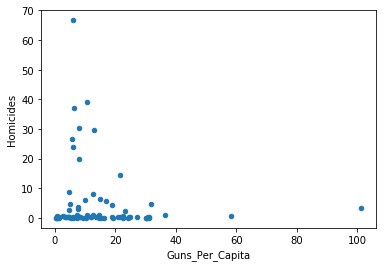

In [21]:
guns.plot.scatter(x='Guns_Per_Capita', y='Homicides')
plt.show()

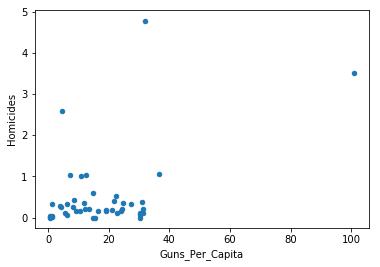

In [22]:
guns[guns.developed_nation == True].plot.scatter(x='Guns_Per_Capita', y='Homicides')
plt.show()